In [20]:
!pip install deepforest 1>pip.install.log

In [32]:
from deepforest import main
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2

In [34]:
imagem1 = '3.png'
imagem2 = '4.png'

In [45]:
def validaArvores(imagem): 
  MODEL_PATH = 'model.opendata_luftbild_dop60.patch400.ckpt'
  model = main.deepforest.load_from_checkpoint(checkpoint_path=MODEL_PATH)
  SAMPLE_TILE_PATH = imagem
  sample_image = np.array(Image.open(SAMPLE_TILE_PATH).convert("RGB")).astype("uint8")
  print("shape:", sample_image.shape)
  plt.imshow(sample_image)
  MODEL_INFERENCE = {
  'patch_size': 100,
  'patch_overlap': 0.2,
  'iou_threshold': 0.05
  }

  # predict_tile returns BGR images and has (H, W, C) dimension
  predict_img = model.predict_tile(image=sample_image,return_plot=True,**MODEL_INFERENCE)
  predict_img = predict_img[:,:,::-1] # BGR => RGB
  plt.imshow(predict_img)

Reading config file: /usr/local/lib/python3.8/dist-packages/deepforest/data/deepforest_config.yml
shape: (808, 1797, 3)


100%|██████████| 230/230 [19:09<00:00,  5.00s/it]


33841 predictions in overlapping windows, applying non-max supression
22862 predictions kept after non-max suppression


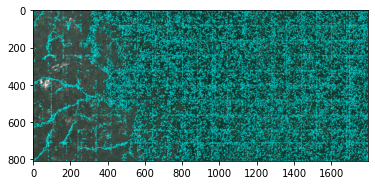

In [46]:
result1 = validaArvores(imagem1)

Reading config file: /usr/local/lib/python3.8/dist-packages/deepforest/data/deepforest_config.yml
shape: (806, 1792, 3)


100%|██████████| 230/230 [19:26<00:00,  5.07s/it]


26447 predictions in overlapping windows, applying non-max supression
18410 predictions kept after non-max suppression


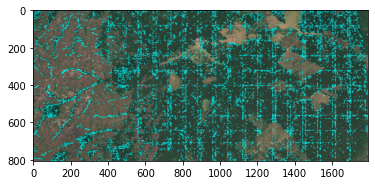

In [47]:
result2 = validaArvores(imagem2)